In [1]:
import datetime
import pandas as pd
import requests # to work with the api
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

#### Retrieving Bitcoin price data from coindesk

In [2]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017,1,1)
end = datetime.date(2021,5,9)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [3]:
print(url)

https://api.coindesk.com/v1/bpi/historical/close.json?start=2017-01-01&end=2021-05-09


In [8]:
data = pd.read_json(result.content).iloc[:-2,:1]

,bpi
2021-05-05,57501.2150
2021-05-06,56437.9833
2021-05-07,57351.0667
2021-05-08,58940.0250
2021-05-09,58290.3300


In [11]:
data.index.name = 'date'

In [12]:
data.index = pd.to_datetime(data.index)

In [13]:
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2021-05-05,57501.2150
2021-05-06,56437.9833
2021-05-07,57351.0667


In [15]:
data.shape

(1590, 1)

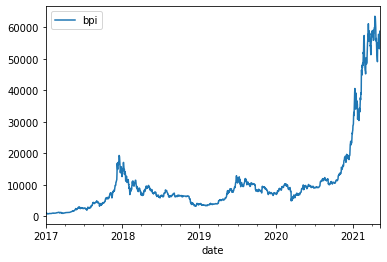

In [16]:
data.plot()

#### Time Series Data Resampling

In [17]:
data.resample('Q').mean() # Quarterly

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


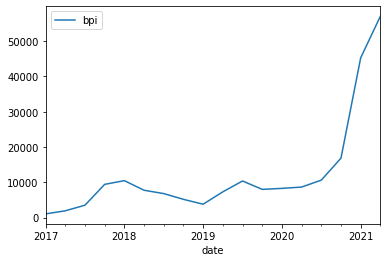

In [18]:
data.resample('Q').mean().plot()

In [19]:
data.resample('M').mean() # Monthly resampling

,bpi
date,
2017-01-31,911.259258
2017-02-28,1064.382100
2017-03-31,1129.790194
2017-04-30,1218.319247
2017-05-31,1884.280513
2017-06-30,2657.555067
2017-07-31,2533.259458
2017-08-31,3914.709377
2017-09-30,4090.707313


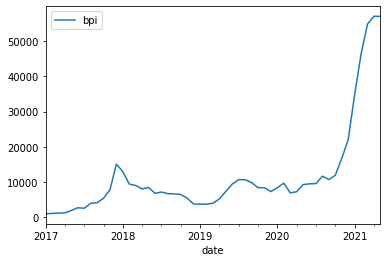

In [21]:
data.resample('M').mean().plot()

#### Time Series Data Differences

In [22]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [24]:
data[:5].diff() # calculating single difference 1018.0500-997.6888=20.3612

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [25]:
data[:5].diff(2) # calculating 1030.8175-997.6888=33.1287

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


#### Data Shifting

In [27]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [29]:
data[:5].shift(2) # shifts data to 2 future points

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175


In [30]:
data[:5].tshift(2) # shifts time or time index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [31]:
data[:5]-data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


In [32]:
data[:5]-data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


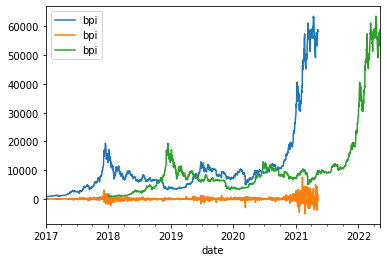

In [33]:
pd.concat([data,data-data.shift(),data.tshift(365)],axis=1).plot()

#### Time Series Data Smoothing

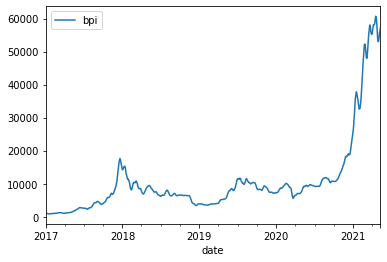

In [34]:
data.rolling(window=10).mean().plot()

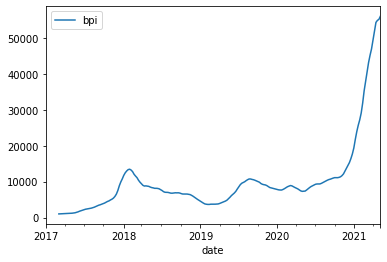

In [35]:
data.resample('W').mean().rolling(window=10).mean().plot()

In [36]:
data.resample('W').mean().rolling(window = 10).mean().head(10)

,bpi
date,
2017-01-01,NaN
2017-01-08,NaN
2017-01-15,NaN
2017-01-22,NaN
2017-01-29,NaN
2017-02-05,NaN
2017-02-12,NaN
2017-02-19,NaN
2017-02-26,NaN


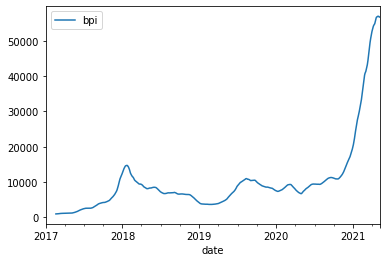

In [37]:
data.rolling(window=50).mean().plot()

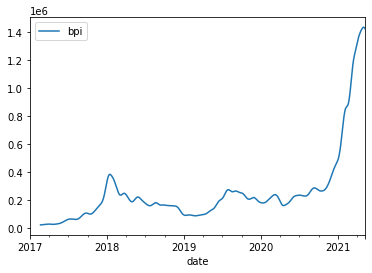

In [38]:
data.rolling(window=50,win_type='gaussian').sum(std =10).plot() #if we add window type gaussian with std dev of 10 the it is adding somw weights to the data

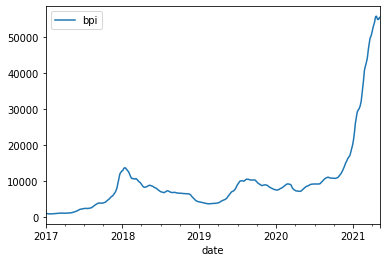

In [39]:

data.ewm(span=50).mean().plot() #ewm is exponential moving average, the main purpose of ewm we give more weightage to recent values rather than historical values

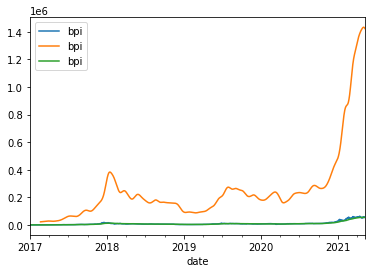

In [40]:
pd.concat([data,data.rolling(window=50,win_type='gaussian').sum(std =10),data.ewm(span=50).mean()],axis=1).plot()

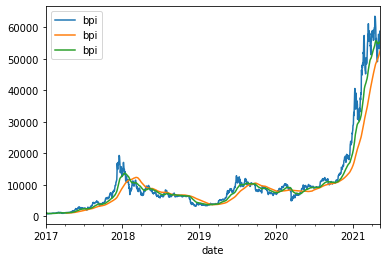

In [41]:
rolling_window_100=data.rolling(window=100).mean()
ewm_50 =data.ewm(span=50).mean()
pd.concat([data,rolling_window_100,ewm_50],axis=1).plot()